# Project 1
## The Net Wars: Attack of the Bots
### Advanced Machine Learning - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# Just to make plots look better
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

|Class  |Label |
| ----- | ---- | 
|Normal	|0     |
|Dos	|1     |
|R2L	|2     |
|U2R	|3     |
|Probe	|4     |

In [156]:
PATH_TO_DATA = 'dataset/'

test_students = pd.read_csv(PATH_TO_DATA + 'test_students.csv')
SampleID = test_students['SampleID']

train_students = pd.read_csv(PATH_TO_DATA + 'train_students.csv')


In [157]:
test_students = test_students.drop('SampleID', axis=1)

### Check Nulls and DataType

In [158]:
print(test_students.info())
print(train_students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44556 entries, 0 to 44555
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     44556 non-null  int64  
 1   protocol_type                44556 non-null  object 
 2   service                      44556 non-null  object 
 3   flag                         44556 non-null  object 
 4   src_bytes                    44556 non-null  int64  
 5   dst_bytes                    44556 non-null  int64  
 6   land                         44556 non-null  int64  
 7   wrong_fragment               44556 non-null  int64  
 8   urgent                       44556 non-null  int64  
 9   hot                          44556 non-null  int64  
 10  num_failed_logins            44556 non-null  int64  
 11  logged_in                    44556 non-null  int64  
 12  num_compromised              44556 non-null  int64  
 13  root_shell      

O service do train_students tem mais um tipo que no test_students. Acabei por tirar para facilitar

### Correct possible outliers

<AxesSubplot:>

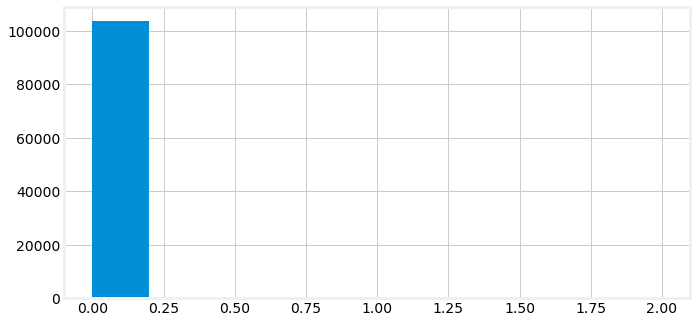

In [159]:
num_ts = train_students.select_dtypes(include=np.number)

train_students[num_ts.columns[14]].hist()

As features não são seguem uma distribuição normal. Deste modo, o melhor método para detetar outliers é o IQR

In [160]:
num_ts = train_students.select_dtypes(include=np.number)

k = 1.5 #limiar habitual

for c in num_ts.columns:
    asc = train_students[c].sort_values()   #coluna por ordem ascendente
    qs = asc.quantile([0.25, 0.75])
    iqr = qs[0.75] - qs[0.25]

    display(train_students.loc[train_students[c] < (qs[0.25] - (k * iqr)), c])
    display(train_students.loc[train_students[c] > (qs[0.75] + (k * iqr)), c])
    
    #train_students.loc[train_students[c] < (qs[0.25] - (k * iqr)), c] = train_students[c].mean()
    #train_students.loc[train_students[c] > (qs[0.75] + (k * iqr)), c] = train_students[c].mean()


Series([], Name: duration, dtype: int64)

0            1
12        9592
19        1261
28          26
35         281
          ... 
103923    2646
103947       2
103952       5
103953       1
103959      50
Name: duration, Length: 9369, dtype: int64

Series([], Name: src_bytes, dtype: int64)

0            2599
7             870
18          54540
20           1030
42           1331
           ...   
103894    5133876
103931       2593
103944        834
103952        908
103953       2599
Name: src_bytes, Length: 11467, dtype: int64

Series([], Name: dst_bytes, dtype: int64)

2          13254
3           1582
5           1810
18          8314
19        219837
           ...  
103941     13343
103946      1512
103949      1469
103955      2698
103959      2615
Name: dst_bytes, Length: 18322, dtype: int64

Series([], Name: land, dtype: int64)

274      1
2176     1
3032     1
8981     1
10238    1
13905    1
27651    1
41819    1
42699    1
44930    1
52626    1
57226    1
65051    1
73262    1
79124    1
86400    1
87158    1
Name: land, dtype: int64

Series([], Name: wrong_fragment, dtype: int64)

32        3
51        3
99        3
177       3
371       3
         ..
103285    3
103326    3
103595    3
103816    3
103934    3
Name: wrong_fragment, Length: 831, dtype: int64

Series([], Name: urgent, dtype: int64)

7939     1
10682    1
31465    1
34971    1
51467    1
52312    1
58625    2
64092    1
78025    3
85783    2
86357    2
86604    2
Name: urgent, dtype: int64

Series([], Name: hot, dtype: int64)

18        2
28        6
35        2
90        2
108       2
         ..
103828    2
103865    6
103873    2
103894    5
103959    1
Name: hot, Length: 2558, dtype: int64

Series([], Name: num_failed_logins, dtype: int64)

132       3
147       1
207       1
228       1
250       1
         ..
101248    1
101255    1
101476    1
103210    1
103427    1
Name: num_failed_logins, Length: 408, dtype: int64

Series([], Name: logged_in, dtype: int64)

Series([], Name: logged_in, dtype: int64)

Series([], Name: num_compromised, dtype: int64)

18        1
19        2
90        1
277       1
315       1
         ..
103777    4
103785    1
103828    1
103873    1
103913    2
Name: num_compromised, Length: 1139, dtype: int64

Series([], Name: root_shell, dtype: int64)

19        1
3354      1
3644      1
5597      1
6946      1
         ..
96524     1
99446     1
99752     1
102511    1
103959    1
Name: root_shell, Length: 155, dtype: int64

Series([], Name: su_attempted, dtype: int64)

19        2
3354      2
7045      2
7327      2
7956      1
12235     1
14588     2
15925     1
17340     1
17722     2
19094     2
20003     2
23415     2
24764     2
26812     2
28832     2
31465     2
38265     2
40467     1
42921     1
45605     2
46234     2
46512     1
48800     2
52237     2
56705     2
57052     2
58625     2
61055     2
61615     1
62029     1
64147     2
66104     1
66382     2
66686     2
67095     2
67557     2
69916     1
70878     2
72074     1
74984     2
75412     2
76976     2
78156     1
83197     1
83536     2
84846     2
85358     2
85368     2
86240     2
88097     2
88187     2
88285     1
96524     2
99752     2
102511    2
Name: su_attempted, dtype: int64

Series([], Name: num_root, dtype: int64)

19        4
475       1
817       1
847       1
1181      1
         ..
103599    1
103834    1
103847    6
103920    1
103959    5
Name: num_root, Length: 478, dtype: int64

Series([], Name: num_file_creations, dtype: int64)

19         1
42         1
290        2
1838       2
2939       1
          ..
100508    18
102511     9
102957    17
103777    20
103959     1
Name: num_file_creations, Length: 234, dtype: int64

Series([], Name: num_shells, dtype: int64)

1829      1
2479      1
3589      1
5239      1
5872      1
7079      1
8341      1
10021     1
14340     1
17020     1
23123     1
30206     2
31135     1
31497     1
31722     1
32503     2
33405     1
34617     2
34653     1
34751     1
41843     1
42823     1
44290     1
50043     1
50511     1
51467     1
53052     1
54015     1
59231     1
59445     1
63914     1
65386     1
66834     1
67274     1
68521     1
75793     2
78156     1
79205     1
80279     1
84005     1
85067     1
88745     1
89930     2
93595     1
96374     1
99944     1
103959    1
Name: num_shells, dtype: int64

Series([], Name: num_access_files, dtype: int64)

203       1
786       2
1287      1
2687      1
2994      1
         ..
102761    1
103555    1
103635    1
103955    1
103959    1
Name: num_access_files, Length: 313, dtype: int64

Series([], Name: num_outbound_cmds, dtype: int64)

Series([], Name: num_outbound_cmds, dtype: int64)

Series([], Name: is_host_login, dtype: int64)

11009     1
12357     1
29119     1
35167     1
35448     1
44692     1
48152     1
66534     1
96078     1
103959    1
Name: is_host_login, dtype: int64

Series([], Name: is_guest_login, dtype: int64)

28        1
35        1
207       1
228       1
351       1
         ..
103453    1
103601    1
103769    1
103779    1
103865    1
Name: is_guest_login, Length: 1273, dtype: int64

Series([], Name: count, dtype: int64)

69        510
103       511
111       511
170       511
185       511
         ... 
103807    511
103810    446
103819    511
103850    511
103868    399
Name: count, Length: 3122, dtype: int64

Series([], Name: srv_count, dtype: int64)

13         42
15        510
52        254
56        185
58        160
         ... 
103917    318
103924    245
103926    239
103930    289
103960    201
Name: srv_count, Length: 10603, dtype: int64

Series([], Name: serror_rate, dtype: float64)

Series([], Name: serror_rate, dtype: float64)

Series([], Name: srv_serror_rate, dtype: float64)

Series([], Name: srv_serror_rate, dtype: float64)

Series([], Name: rerror_rate, dtype: float64)

9         1.00
30        1.00
31        1.00
37        1.00
38        0.10
          ... 
103940    1.00
103942    1.00
103943    0.67
103950    1.00
103956    1.00
Name: rerror_rate, Length: 15494, dtype: float64

Series([], Name: srv_rerror_rate, dtype: float64)

9         0.71
30        1.00
31        1.00
37        1.00
38        0.04
          ... 
103940    1.00
103942    1.00
103943    0.67
103950    1.00
103956    1.00
Name: srv_rerror_rate, Length: 15422, dtype: float64

Series([], Name: same_srv_rate, dtype: float64)

Series([], Name: same_srv_rate, dtype: float64)

Series([], Name: diff_srv_rate, dtype: float64)

6         0.69
7         1.00
11        0.35
12        0.50
69        1.00
          ... 
103868    1.00
103874    0.33
103875    1.00
103920    1.00
103954    0.19
Name: diff_srv_rate, Length: 6913, dtype: float64

Series([], Name: srv_diff_host_rate, dtype: float64)

3         0.12
4         0.16
5         0.15
9         0.57
14        0.43
          ... 
103935    1.00
103939    0.10
103941    0.25
103946    0.07
103952    0.75
Name: srv_diff_host_rate, Length: 23434, dtype: float64

Series([], Name: dst_host_count, dtype: int64)

Series([], Name: dst_host_count, dtype: int64)

Series([], Name: dst_host_srv_count, dtype: int64)

Series([], Name: dst_host_srv_count, dtype: int64)

Series([], Name: dst_host_same_srv_rate, dtype: float64)

Series([], Name: dst_host_same_srv_rate, dtype: float64)

Series([], Name: dst_host_diff_srv_rate, dtype: float64)

6         0.93
7         0.50
11        0.27
12        0.41
46        1.00
          ... 
103856    0.58
103868    1.00
103886    0.67
103898    0.89
103923    0.54
Name: dst_host_diff_srv_rate, Length: 8865, dtype: float64

Series([], Name: dst_host_same_src_port_rate, dtype: float64)

6         0.20
7         0.25
8         0.20
11        0.79
12        0.90
          ... 
103923    0.94
103924    0.21
103926    1.00
103935    1.00
103942    0.33
Name: dst_host_same_src_port_rate, Length: 20029, dtype: float64

Series([], Name: dst_host_srv_diff_host_rate, dtype: float64)

2         0.04
8         0.10
20        0.03
21        0.05
27        0.03
          ... 
103916    0.04
103935    0.19
103939    0.03
103942    0.08
103943    0.17
Name: dst_host_srv_diff_host_rate, Length: 19388, dtype: float64

Series([], Name: dst_host_serror_rate, dtype: float64)

Series([], Name: dst_host_serror_rate, dtype: float64)

Series([], Name: dst_host_srv_serror_rate, dtype: float64)

Series([], Name: dst_host_srv_serror_rate, dtype: float64)

Series([], Name: dst_host_rerror_rate, dtype: float64)

0         0.69
6         0.69
9         0.52
11        0.18
18        0.05
          ... 
103942    1.00
103943    0.95
103950    1.00
103953    0.23
103956    1.00
Name: dst_host_rerror_rate, Length: 22492, dtype: float64

Series([], Name: dst_host_srv_rerror_rate, dtype: float64)

9         0.80
18        0.05
30        1.00
31        1.00
37        1.00
          ... 
103940    1.00
103942    0.97
103943    0.99
103950    1.00
103956    1.00
Name: dst_host_srv_rerror_rate, Length: 18700, dtype: float64

In [161]:
'''
# TO SEE IF WE CONTINUE TO HAVE OUTLIERS

for c in num_ts.columns:
    asc = train_students[c].sort_values()   #coluna por ordem ascendente
    qs = asc.quantile([0.25, 0.75])
    iqr = qs[0.75] - qs[0.25]

    print(len(train_students.loc[train_students[c] < (qs[0.25] - (k * iqr)), c]))
    print(len(train_students.loc[train_students[c] > (qs[0.75] + (k * iqr)), c]))
'''

'\n# TO SEE IF WE CONTINUE TO HAVE OUTLIERS\n\nfor c in num_ts.columns:\n    asc = train_students[c].sort_values()   #coluna por ordem ascendente\n    qs = asc.quantile([0.25, 0.75])\n    iqr = qs[0.75] - qs[0.25]\n\n    print(len(train_students.loc[train_students[c] < (qs[0.25] - (k * iqr)), c]))\n    print(len(train_students.loc[train_students[c] > (qs[0.75] + (k * iqr)), c]))\n'

In [162]:
'''
# OTHER METHOD FOR NORMAL DISTRIBUTED

for c in num_ts.columns:
    print(len(train_students[train_students[c] < (train_students[c].mean() - (3*train_students[c].std()))]))
    print(len(train_students[train_students[c] > (train_students[c].mean() + (3*train_students[c].std()))]))
'''

'\n# OTHER METHOD FOR NORMAL DISTRIBUTED\n\nfor c in num_ts.columns:\n    print(len(train_students[train_students[c] < (train_students[c].mean() - (3*train_students[c].std()))]))\n    print(len(train_students[train_students[c] > (train_students[c].mean() + (3*train_students[c].std()))]))\n'

### Normalization

In [163]:
display(train_students)

for c in num_ts.columns:
    minV = train_students[c].min()
    maxV = train_students[c].max()
    train_students[c] = (train_students[c] - minV) / (maxV - minV)

display(train_students)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,1,tcp,smtp,SF,2599,293,0,0,0,0,...,74,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0,Dos
1,0,tcp,login,S0,0,0,0,0,0,0,...,18,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0,Dos
2,0,tcp,http,SF,280,13254,0,0,0,0,...,254,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0,normal
3,0,tcp,http,SF,230,1582,0,0,0,0,...,255,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0,normal
4,0,tcp,http,SF,218,483,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0,tcp,echo,RSTO,0,0,0,0,0,0,...,4,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0,Dos
103957,0,tcp,telnet,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0,Dos
103958,0,tcp,smtp,SF,0,83,0,0,0,0,...,124,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0,normal
103959,50,tcp,telnet,SF,226,2615,0,0,0,1,...,2,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0,R2L


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0.000018,tcp,smtp,SF,1.883383e-06,2.236748e-07,0.0,0.0,0.0,0.000000,...,0.290196,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0,Dos
1,0.000000,tcp,login,S0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.070588,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0,Dos
2,0.000000,tcp,http,SF,2.029039e-07,1.011804e-05,0.0,0.0,0.0,0.000000,...,0.996078,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0,normal
3,0.000000,tcp,http,SF,1.666710e-07,1.207691e-06,0.0,0.0,0.0,0.000000,...,1.000000,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0,normal
4,0.000000,tcp,http,SF,1.579751e-07,3.687199e-07,0.0,0.0,0.0,0.000000,...,1.000000,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0.000000,tcp,echo,RSTO,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.015686,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0,Dos
103957,0.000000,tcp,telnet,S0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.015686,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0,Dos
103958,0.000000,tcp,smtp,SF,0.000000e+00,6.336181e-08,0.0,0.0,0.0,0.000000,...,0.486275,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0,normal
103959,0.000918,tcp,telnet,SF,1.637724e-07,1.996279e-06,0.0,0.0,0.0,0.012987,...,0.007843,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0,R2L


In [124]:
train_students = pd.get_dummies(train_students, columns=['protocol_type'], drop_first=True)
train_students = train_students.drop('service', axis=1)
#train_students = pd.get_dummies(train_students, columns=['service'], drop_first=True)
train_students= pd.get_dummies(train_students, columns=['flag'], drop_first=True)

test_students = pd.get_dummies(test_students, columns=['protocol_type'], drop_first=True)
test_students = test_students.drop('service', axis=1)
#test_students = pd.get_dummies(test_students, columns=['service'], drop_first=True)
test_students= pd.get_dummies(test_students, columns=['flag'], drop_first=True)

In [125]:
train_students.replace('normal', 0, inplace=True)
train_students.replace('Dos', 1, inplace=True)
train_students.replace('R2L', 2, inplace=True)
train_students.replace('U2R', 3, inplace=True)
train_students.replace('Probe', 4, inplace=True)


In [126]:
y_train = train_students['attack_type']
X_train = train_students.drop('attack_type', axis=1)

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_t, y_train, y_t = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_t, y_t, test_size=0.5, random_state=42)

### Ensembles

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

voting = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('kn', knn), 
        ('dt', dt), 
        ('rf', rf)
    ],
    voting='soft'
)

ensemble = GridSearchCV(
    voting,
    {},
    scoring=['accuracy', 'precision', 'recall', 'f1_micro'],
    refit='accuracy',
    cv=5
)

ensemble.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(max_iter=1000)),
                                                    ('kn',
                                                     KNeighborsClassifier()),
                                                    ('dt',
                                                     DecisionTreeClassifier()),
                                                    ('rf',
                                                     RandomForestClassifier())],
                                        voting='soft'),
             param_grid={}, refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1_micro'])

In [30]:
lista_classifiers = [('LogisticRegression', lr), ('KNeighborsClassifier', knn), ('DecisionTreeClassifier', dt), ('RandomForestClassifier', rf), ('VotingClassifier', voting), ]

### Todos os modelos

In [ ]:
for name, model in lista_classifiers:
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_micro')
    print(f'F1-Score: {scores.mean()} ', f'(+/- {scores.std()}) [{name}]')

### Demorou a correr então não experimentei

In [ ]:
scores = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='f1_micro')
print(f'F1-Score: {scores.mean()} ', f'(+/- {scores.std()}) [{name}]')

In [130]:
pred = ensemble.predict(test_students)

In [131]:
submission = pd.DataFrame({'SampleID': SampleID, 'Class': pred})
print(submission)
submission.to_csv('submission1.csv', index=False)

       SampleID  Class
0             0      0
1             1      0
2             2      0
3             3      0
4             4      1
...         ...    ...
44551     44551      0
44552     44552      1
44553     44553      1
44554     44554      0
44555     44555      0

[44556 rows x 2 columns]


### Só modelo ensemble

Ainda deve existir algum overfitting

Accuracy: 0.9941323585994614 [LogisticRegression]
F1-score: 0.9941323585994614 [LogisticRegression]
Precision: 0.9941323585994614 [LogisticRegression]
Recall: 0.9941323585994614 [LogisticRegression]
Confusion Matrix: [LogisticRegression]


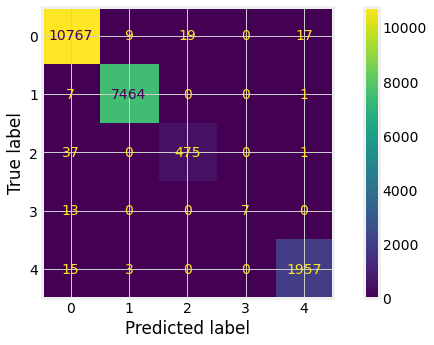

In [133]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f'Accuracy: {accuracy_score(y_test, pred)} [{name}]')
print(f'F1-score: {f1_score(y_test, pred, average="micro")} [{name}]')
print(f'Precision: {precision_score(y_test, pred, average="micro")} [{name}]')
print(f'Recall: {recall_score(y_test, pred, average="micro")} [{name}]')
print(f'Confusion Matrix: [{name}]')
conf_m = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, pred), display_labels=[0,1,2,3,4])
conf_m.plot()
plt.show()

### Todos os modelos

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

for name, model in lista_classifiers:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, pred)} [{name}]')
    print(f'F1-score: {f1_score(y_test, pred, average="micro")} [{name}]')
    print(f'Precision: {precision_score(y_test, pred, average="micro")} [{name}]')
    print(f'Recall: {recall_score(y_test, pred, average="micro")} [{name}]')
    print(f'Confusion Matrix: [{name}]')
    conf_m = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, pred), display_labels=[0,1,2,3,4])
    conf_m.plot()
    plt.show()
    print("===========================================")